Firstly, we load the dataset. Because we need to predict the salary for an employee based on his level so we really do not need the first column ('position' column).

In [5]:
import pandas as pd
input_file = '/kaggle/input/svr-inputcsv/svr_input.csv'
datasets = pd.read_csv(input_file)
X = datasets.iloc[:, 1:2].values
Y = datasets.iloc[:, 2].values

Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
Y = Y.reshape(-1,1)

Doing feature scaling.

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

Fitting the SVR model to the dataset


In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting a new result with the polynomial regression.

In [10]:
import numpy as np
Y_Pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([6.5]).reshape(-1,1))))

Finally, visualizing the regression results.

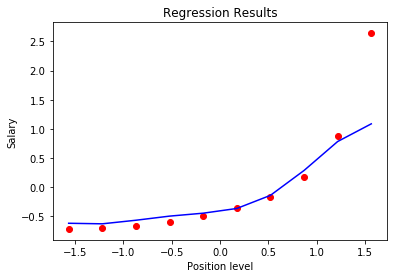

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X,Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Regression Results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [15]:
# First transform 6.5 to feature scaling
sc_X_val = sc_X.transform(np.array([[6.5]]))
# Second predict the value
scaled_y_pred = regressor.predict(sc_X_val)
# Third - since this is scaled - we have to inverse transform
y_pred = sc_Y.inverse_transform(scaled_y_pred) 
print('The predicted salary of a person at 6.5 Level is ',y_pred)

The predicted salary of a person at 6.5 Level is  [170370.0204065]
